In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import mapping, LineString
from shapely.ops import unary_union
import matplotlib.pyplot as plt

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

<AxesSubplot: >

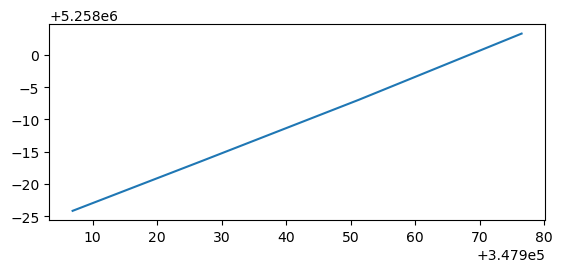

In [3]:
shp_data = gpd.read_file(r"inp.geojson")
shp_data.plot()

C:\Users\Fuzail.Palnak\UHD\openSource\gtkit\gkit\geomops.py:110: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  boundary = [line.boundary[1]]
C:\Users\Fuzail.Palnak\UHD\openSource\gtkit\gkit\mesh.py:537: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return np.concatenate([line])
C:\Users\Fuzail.Palnak\UHD\openSource\gtkit\gkit\mesh.py:588: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  np.expand_dims(np.array(np.concatenate([self.geom])), axis=0),


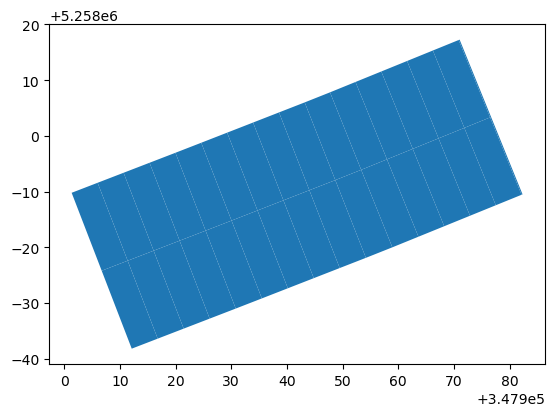

In [4]:
from gkit.geomops import interpolate_with_delta
from gkit.mesh import mesh_from_line

gdf_list = []
cp = interpolate_with_delta(
    unary_union(shp_data["geometry"]), 5
)
mesh = mesh_from_line(LineString(cp), 15, 3)
for data in mesh.mesh():
    gdf = gpd.GeoDataFrame(geometry=[data["geom"]], crs=shp_data.crs)
    gdf_list.append(gdf)

merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=shp_data.crs)

merged_gdf.plot()
plt.show()
